# Early Predictor for Student Success Based on Behavioural and Demographical Indicators

The aim of this study is to explore an efficient predictive model, using both behavioural and demographical data extracted from the anonymised Open University Learning Analytics Dataset (OULAD). This study takes into consideration both behavioural and demographical data with the objective being earlier prediction of finer classification of students in online learning especially within the context of MOOCs.

## Dataset

The dataset used in this study is the anonymised OULAD (Open University Learning Analytics Dataset)1, which contains data about 7 courses and 32,593 registered students (55% males, 45% females), as well as their 10,655,280 interactions (clicks on webpages) with these 7 courses in the Virtual Learning Environment (VLE), operated by the Open University2. The dataset is in the format of 7 csv files, connected using unique identifiers including Student_ID, Assessment_ID, and Code_Module (ID of a
course).

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

## assessments (df1)

In [205]:
#load data
df1 = pd.read_csv("assessments.csv")
df1.info()
df1.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,NaN,100.0
6,AAA,2014J,1758,TMA,19.0,10.0
7,AAA,2014J,1759,TMA,54.0,20.0
8,AAA,2014J,1760,TMA,117.0,20.0
9,AAA,2014J,1761,TMA,166.0,20.0


In [206]:
#shape
num_examples, num_features = df1.shape

print(f"Number of examples: {num_examples}")
print(f"Number of features: {num_features}")

Number of examples: 206
Number of features: 6


In [207]:
#displaying data type of each value using the 4th row as an example
example_index = 3  

# Get the third example (row) as a Series
example = df1.iloc[example_index]

# Iterate through the columns (features) and print their data types
for feature, data_type in example.items():
    print(f"Feature '{feature}' has data type: {type(data_type).__name__}")

Feature 'code_module' has data type: str
Feature 'code_presentation' has data type: str
Feature 'id_assessment' has data type: int64
Feature 'assessment_type' has data type: str
Feature 'date' has data type: float64
Feature 'weight' has data type: float64


In [208]:
#showing descriptive statistics
df1.describe()

,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


In [209]:
#check for missing values
df1.isna().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

we can see that the 'date' feature is the only one with the missing values
there are various strategies for dealing with missing values, depending on the context
since the researchers in the given study did not use the 'date' feature, I have concluded this column can be dropped

In [210]:
#dropping 'date'
df1 = df1.drop(columns=['date'])
df1

,code_module,code_presentation,id_assessment,assessment_type,weight
0,AAA,2013J,1752,TMA,10.0
1,AAA,2013J,1753,TMA,20.0
2,AAA,2013J,1754,TMA,20.0
3,AAA,2013J,1755,TMA,20.0
4,AAA,2013J,1756,TMA,30.0
...,...,...,...,...,...
201,GGG,2014J,37443,CMA,0.0
202,GGG,2014J,37435,TMA,0.0
203,GGG,2014J,37436,TMA,0.0
204,GGG,2014J,37437,TMA,0.0


In [211]:
df1.isna().sum()

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
weight               0
dtype: int64

now let's check for monotonous values

In [212]:
df1.nunique()

code_module            7
code_presentation      4
id_assessment        206
assessment_type        3
weight                24
dtype: int64

we can see that id_assessment is a monotonous attribute and could therefore be removed, but since 'id_assessment' is a unique identifier according to the researchers, and serves as a key to connect data across the seven CSV files, removing it might lead to losing the ability to link information across different datasets. Therefore it will not be removed just now.

In [213]:
#checking for outliers
df1.describe()

,id_assessment,weight
count,206.000000,206.000000
mean,26473.975728,20.873786
std,10098.625521,30.384224
min,1752.000000,0.000000
25%,15023.250000,0.000000
50%,25364.500000,12.500000
75%,34891.750000,24.250000
max,40088.000000,100.000000


In [214]:
#one hot encoding
df1_tmp=df1.copy()
# we define the encoder
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(df1[['assessment_type']])
# we transform the data
df1_tmp = encoder.transform(df1[['assessment_type']])
df1_tmp = pd.DataFrame(df1_tmp.toarray(), columns=encoder.get_feature_names_out(['assessment_type']))
#dodajemo u df1
df1 = pd.concat([df1, df1_tmp], axis=1)
df1

,code_module,code_presentation,id_assessment,assessment_type,weight,assessment_type_CMA,assessment_type_Exam,assessment_type_TMA
0,AAA,2013J,1752,TMA,10.0,0.0,0.0,1.0
1,AAA,2013J,1753,TMA,20.0,0.0,0.0,1.0
2,AAA,2013J,1754,TMA,20.0,0.0,0.0,1.0
3,AAA,2013J,1755,TMA,20.0,0.0,0.0,1.0
4,AAA,2013J,1756,TMA,30.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,0.0,1.0,0.0,0.0
202,GGG,2014J,37435,TMA,0.0,0.0,0.0,1.0
203,GGG,2014J,37436,TMA,0.0,0.0,0.0,1.0
204,GGG,2014J,37437,TMA,0.0,0.0,0.0,1.0


In [215]:
#one hot encoding the feature code_presentation
df1_tmp=df1.copy()
# we define the encoder
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(df1[['code_presentation']])
# we transform the data
df1_tmp = encoder.transform(df1[['code_presentation']])
df1_tmp = pd.DataFrame(df1_tmp.toarray(), columns=encoder.get_feature_names_out(['code_presentation']))
#dodajemo u df1
df1 = pd.concat([df1, df1_tmp], axis=1)
df1

,code_module,code_presentation,id_assessment,assessment_type,weight,assessment_type_CMA,assessment_type_Exam,assessment_type_TMA,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J
0,AAA,2013J,1752,TMA,10.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,AAA,2013J,1753,TMA,20.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,AAA,2013J,1754,TMA,20.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,AAA,2013J,1755,TMA,20.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,AAA,2013J,1756,TMA,30.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
202,GGG,2014J,37435,TMA,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
203,GGG,2014J,37436,TMA,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
204,GGG,2014J,37437,TMA,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


code_module may also be encoded but since it's again one of the variables used by researchers to connect data it's better to use Label Encoder - With Label Encoding, we have a single column ('code_module_encoded') containing numeric labels for each module, making it easier to link datasets without introducing a large number of additional columns.

In [216]:
le = LabelEncoder()
df1['code_module_encoded'] = le.fit_transform(df1['code_module'])
df1

,code_module,code_presentation,id_assessment,assessment_type,weight,assessment_type_CMA,assessment_type_Exam,assessment_type_TMA,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J,code_module_encoded
0,AAA,2013J,1752,TMA,10.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1,AAA,2013J,1753,TMA,20.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
2,AAA,2013J,1754,TMA,20.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
3,AAA,2013J,1755,TMA,20.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
4,AAA,2013J,1756,TMA,30.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6
202,GGG,2014J,37435,TMA,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,6
203,GGG,2014J,37436,TMA,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,6
204,GGG,2014J,37437,TMA,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,6


## courses (df2)

In [35]:
df2 = pd.read_csv("courses.csv")
df2.info()
df2.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 660.0+ bytes


,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [36]:
#displaying data type of each value using the 4th row as an example
example_index = 3  

# Get the third example (row) as a Series
example = df2.iloc[example_index]

# Iterate through the columns (features) and print their data types
for feature, data_type in example.items():
    print(f"Feature '{feature}' has data type: {type(data_type).__name__}")

Feature 'code_module' has data type: str
Feature 'code_presentation' has data type: str
Feature 'module_presentation_length' has data type: int64


In [37]:
#showing descriptive statistics
df2.describe()

,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


In [39]:
#check for missing values
df2.isna().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

In [40]:
#checking for monotonous attributes
df2.nunique()

code_module                   7
code_presentation             4
module_presentation_length    7
dtype: int64

In [41]:
#checking for outliers
df2.describe()

,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


In [42]:
le = LabelEncoder()
df2['code_module_encoded'] = le.fit_transform(df2['code_module'])
df2

,code_module,code_presentation,module_presentation_length,code_module_encoded
0,AAA,2013J,268,0
1,AAA,2014J,269,0
2,BBB,2013J,268,1
3,BBB,2014J,262,1
4,BBB,2013B,240,1
5,BBB,2014B,234,1
6,CCC,2014J,269,2
7,CCC,2014B,241,2
8,DDD,2013J,261,3
9,DDD,2014J,262,3


In [43]:
#one hot encoding the feature code_presentation
df2_tmp=df2.copy()
# we define the encoder
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(df1[['code_presentation']])
# we transform the data
df2_tmp = encoder.transform(df2[['code_presentation']])
df2_tmp = pd.DataFrame(df2_tmp.toarray(), columns=encoder.get_feature_names_out(['code_presentation']))
#dodajemo u df2
df2 = pd.concat([df2, df2_tmp], axis=1)
df2

,code_module,code_presentation,module_presentation_length,code_module_encoded,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J
0,AAA,2013J,268,0,0.0,1.0,0.0,0.0
1,AAA,2014J,269,0,0.0,0.0,0.0,1.0
2,BBB,2013J,268,1,0.0,1.0,0.0,0.0
3,BBB,2014J,262,1,0.0,0.0,0.0,1.0
4,BBB,2013B,240,1,1.0,0.0,0.0,0.0
5,BBB,2014B,234,1,0.0,0.0,1.0,0.0
6,CCC,2014J,269,2,0.0,0.0,0.0,1.0
7,CCC,2014B,241,2,0.0,0.0,1.0,0.0
8,DDD,2013J,261,3,0.0,1.0,0.0,0.0
9,DDD,2014J,262,3,0.0,0.0,0.0,1.0


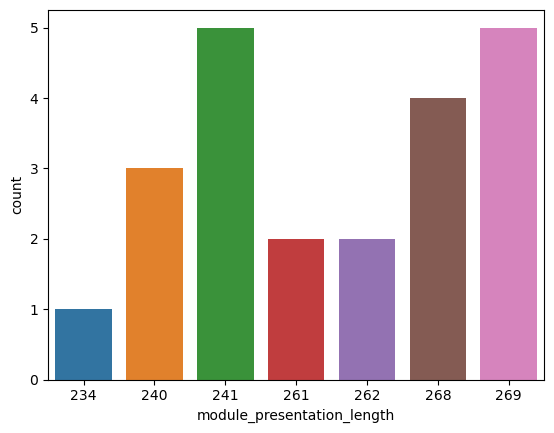

In [237]:
#visualization of module presentation length
df2['module_presentation_length'] = df2['module_presentation_length'].astype('category')
sns.countplot(x='module_presentation_length', data=df2)
plt.show()

## studentinfo (df3)

In [86]:
df3 =  pd.read_csv("studentinfo.csv")
df3

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [87]:
#displaying data type of each value using the 4th row as an example
example_index = 3  

# Get the third example (row) as a Series
example = df3.iloc[example_index]

# Iterate through the columns (features) and print their data types
for feature, data_type in example.items():
    print(f"Feature '{feature}' has data type: {type(data_type).__name__}")

Feature 'code_module' has data type: str
Feature 'code_presentation' has data type: str
Feature 'id_student' has data type: int64
Feature 'gender' has data type: str
Feature 'region' has data type: str
Feature 'highest_education' has data type: str
Feature 'imd_band' has data type: str
Feature 'age_band' has data type: str
Feature 'num_of_prev_attempts' has data type: int64
Feature 'studied_credits' has data type: int64
Feature 'disability' has data type: str
Feature 'final_result' has data type: str


In [88]:
#showing descriptive statistics
df3.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


In [89]:
df3.nunique()
#id_student is once again one of the features used to connect csv files so I decided not to remove it

code_module                 7
code_presentation           4
id_student              28785
gender                      2
region                     13
highest_education           5
imd_band                   10
age_band                    3
num_of_prev_attempts        7
studied_credits            61
disability                  2
final_result                4
dtype: int64

In [91]:
#check for missing values
df3.isna().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [93]:
#since imd_band is not used in the analysis it can be dropped
df3 = df3.drop(columns=['imd_band']
df3

,code_module,code_presentation,id_student,gender,region,highest_education,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,35-55,0,30,N,Withdrawn


In [94]:
df3.isna().sum()

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

In [95]:
#checking for outliers
df3.describe()


,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


the studied_credits feature is a candidate for oulier values, let's look at the feature more closely:


In [96]:
print('studied_credits > 30: ', (df3.studied_credits > 30).sum())
print('studied_credits > 60: ', (df3.studied_credits > 60).sum())
print('studied_credits > 100: ', (df3.studied_credits > 100).sum())
print('studied_credits > 200: ', (df3.studied_credits > 200).sum())
print('studied_credits > 300: ', (df3.studied_credits > 300).sum())
print('studied_credits > 400: ', (df3.studied_credits > 400).sum())
print('studied_credits > 500: ', (df3.studied_credits > 500).sum())
print('studied_credits > 600: ', (df3.studied_credits > 600).sum())

studied_credits > 30:  28844
studied_credits > 60:  12025
studied_credits > 100:  8613
studied_credits > 200:  521
studied_credits > 300:  35
studied_credits > 400:  7
studied_credits > 500:  4
studied_credits > 600:  2


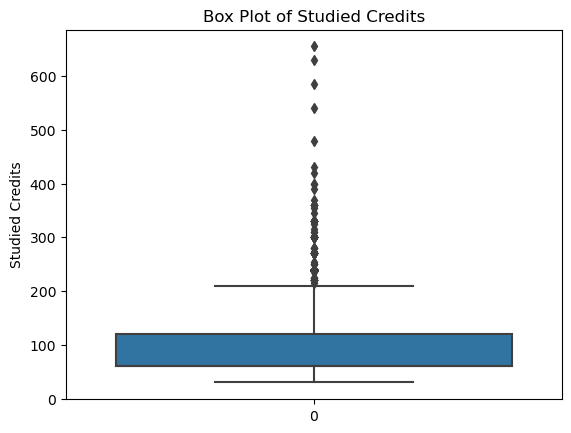

In [97]:
#let's visualize
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df3['studied_credits'], showfliers=True)
plt.title('Box Plot of Studied Credits')
plt.ylabel('Studied Credits')

plt.show()

This visualization allows for a more easier identification of outliers. All these points outside the whiskers are potential outliers. Since this feature is not used in the given analysis, I won't be handling the outliers, but if this feature is to be used in future, it is advisable to further investigate these values (whether they are wrong values, or just unlikely but true values) and treat them accordingly, depending on the goal of the project.

In [184]:
# One-hot encoding
#feature 'region' is not used in the analysis so I will not use it
df3_tmp = df3.copy()

# Define the encoder
encoder = OneHotEncoder(handle_unknown="ignore")
features_to_encode = ['code_presentation', 'gender', 'highest_education', 'disability','final_result']
df3_tmp_encoded = encoder.fit_transform(df3[features_to_encode])
df3_tmp_encoded = pd.DataFrame(df3_tmp_encoded.toarray(), columns=encoder.get_feature_names_out(features_to_encode))

# spajamo u df3
df3 = pd.concat([df3, df3_tmp_encoded], axis=1)
df3

,code_module,code_presentation,id_student,gender,region,highest_education,age_band,num_of_prev_attempts,studied_credits,disability,...,highest_education_HE Qualification,highest_education_Lower Than A Level,highest_education_No Formal quals,highest_education_Post Graduate Qualification,disability_N,disability_Y,final_result_Distinction,final_result_Fail,final_result_Pass,final_result_Withdrawn
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,55<=,0,240,N,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,35-55,0,60,N,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,35-55,0,60,Y,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,35-55,0,60,N,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,0-35,0,60,N,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,0-35,0,30,N,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,35-55,0,30,N,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,0-35,0,30,Y,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,35-55,0,30,N,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [102]:
le = LabelEncoder()
# Label encoding for code_module
le = LabelEncoder()
df3['code_module_encoded'] = le.fit_transform(df3['code_module'])

# Label encoding for age_band 
le = LabelEncoder()
df3['age_band_encoded'] = le.fit_transform(df3['age_band'])
df3

,code_module,code_presentation,id_student,gender,region,highest_education,age_band,num_of_prev_attempts,studied_credits,disability,...,code_presentation_2014J,gender_F,gender_M,highest_education_A Level or Equivalent,highest_education_HE Qualification,highest_education_Lower Than A Level,highest_education_No Formal quals,highest_education_Post Graduate Qualification,disability_N,disability_Y
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,55<=,0,240,N,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,35-55,0,60,N,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,35-55,0,60,Y,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,35-55,0,60,N,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,0-35,0,60,N,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,0-35,0,30,N,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,35-55,0,30,N,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,0-35,0,30,Y,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,35-55,0,30,N,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


let's visualize how the data is distributed according to gender, age, and location

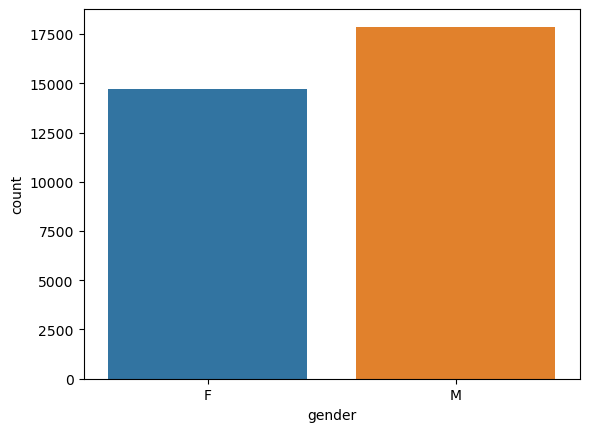

In [219]:
df3['gender'] = df3['gender'].astype('category')
sns.countplot(x='gender', data=df3)
plt.show()   
#we can see that there is an almost equal distribution of female and male students

<Axes: xlabel='age_band'>

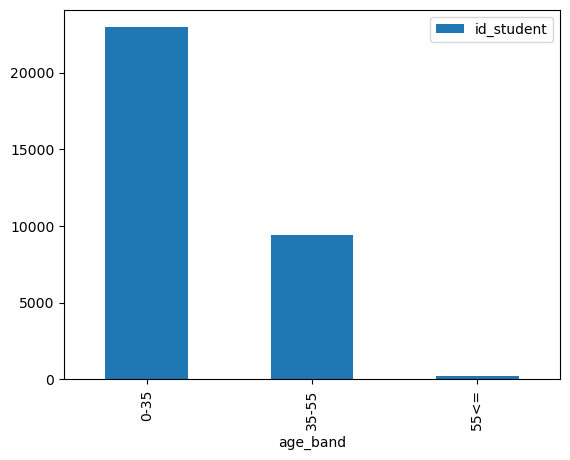

In [221]:
df3[['id_student', 'age_band']].groupby(by='age_band').count().plot.bar()
#most students are under 35

<Axes: xlabel='region'>

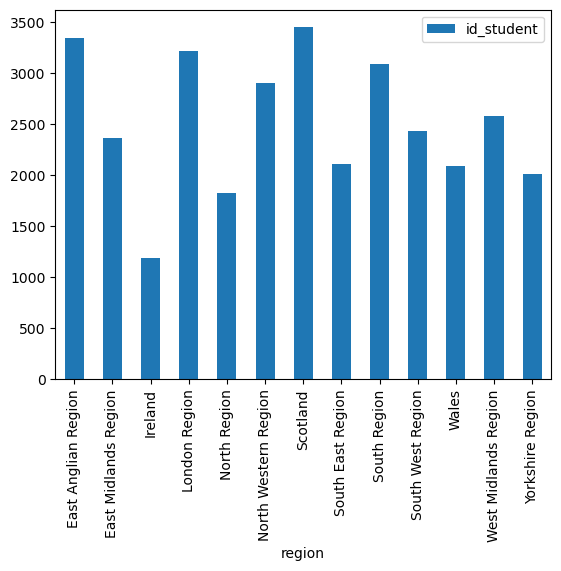

In [223]:
df3[['id_student', 'region']].groupby(by='region').count().plot.bar()

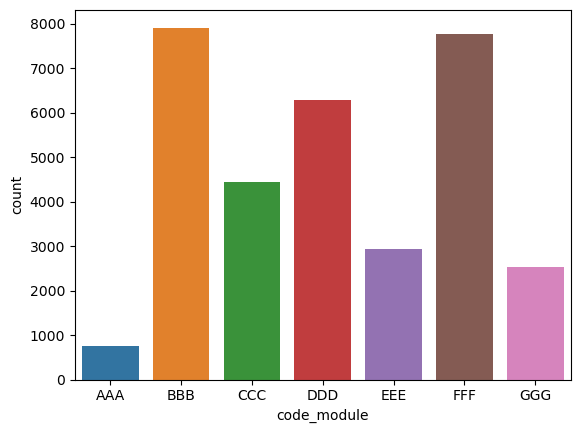

In [228]:
df3['code_module'] = df3['code_module'].astype('category')
sns.countplot(x='code_module', data=df3)
plt.show()
#BBB and FFF have the highest number of students enrolled

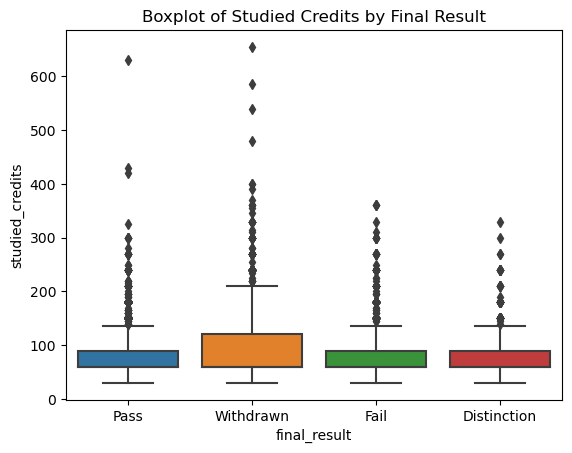

In [241]:
sns.boxplot(x='final_result', y='studied_credits', data=df3)
plt.title("Boxplot of Studied Credits by Final Result")
plt.show()

## student registration (df4)

In [124]:
df4 = pd.read_csv("studentRegistration.csv")
df4

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [125]:
#displaying data type of each value using the 4th row as an example
example_index = 3  

# Get the third example (row) as a Series
example = df4.iloc[example_index]

# Iterate through the columns (features) and print their data types
for feature, data_type in example.items():
    print(f"Feature '{feature}' has data type: {type(data_type).__name__}")

Feature 'code_module' has data type: str
Feature 'code_presentation' has data type: str
Feature 'id_student' has data type: int64
Feature 'date_registration' has data type: float64
Feature 'date_unregistration' has data type: float64


In [126]:
#showing descriptive statistics
df4.describe()

,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


In [133]:
#check for missing values
df4.isna().sum()

code_module          0
code_presentation    0
id_student           0
date_registration    0
dtype: int64

date_unregistration has plenty of missing values, but this feature is not useful for the given analysis so we will just drop it.
date_registration on the other hand is used in the given analysis so we will deal with that. Since there is not a lot of missing values I decided to impute the missing values with median.

In [129]:
print(df4.columns)

Index(['code_module', 'code_presentation', 'id_student', 'date_registration',
       'date_unregistration'],
      dtype='object')


In [130]:
#dropping date_unregistration
df4 = df4.drop(columns=['date_unregistration'])
df4


,code_module,code_presentation,id_student,date_registration
0,AAA,2013J,11391,-159.0
1,AAA,2013J,28400,-53.0
2,AAA,2013J,30268,-92.0
3,AAA,2013J,31604,-52.0
4,AAA,2013J,32885,-176.0
...,...,...,...,...
32588,GGG,2014J,2640965,-4.0
32589,GGG,2014J,2645731,-23.0
32590,GGG,2014J,2648187,-129.0
32591,GGG,2014J,2679821,-49.0


In [132]:
#filling date_registration with median
median_date_registration = df4['date_registration'].median()
df4['date_registration'].fillna(median_date_registration, inplace=True)
df4

,code_module,code_presentation,id_student,date_registration
0,AAA,2013J,11391,-159.0
1,AAA,2013J,28400,-53.0
2,AAA,2013J,30268,-92.0
3,AAA,2013J,31604,-52.0
4,AAA,2013J,32885,-176.0
...,...,...,...,...
32588,GGG,2014J,2640965,-4.0
32589,GGG,2014J,2645731,-23.0
32590,GGG,2014J,2648187,-129.0
32591,GGG,2014J,2679821,-49.0


In [134]:
df4.nunique() #again, id_student is unique identifier so I won't remove the column

code_module              7
code_presentation        4
id_student           28785
date_registration      332
dtype: int64

In [135]:
#encoding as previously
#one hot encoding the feature code_presentation
df4_tmp=df4.copy()
# we define the encoder
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(df4[['code_presentation']])
# we transform the data
df4_tmp = encoder.transform(df4[['code_presentation']])
df4_tmp = pd.DataFrame(df4_tmp.toarray(), columns=encoder.get_feature_names_out(['code_presentation']))
#dodajemo u df4
df4 = pd.concat([df4, df4_tmp], axis=1)
df4

,code_module,code_presentation,id_student,date_registration,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J
0,AAA,2013J,11391,-159.0,0.0,1.0,0.0,0.0
1,AAA,2013J,28400,-53.0,0.0,1.0,0.0,0.0
2,AAA,2013J,30268,-92.0,0.0,1.0,0.0,0.0
3,AAA,2013J,31604,-52.0,0.0,1.0,0.0,0.0
4,AAA,2013J,32885,-176.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,0.0,0.0,0.0,1.0
32589,GGG,2014J,2645731,-23.0,0.0,0.0,0.0,1.0
32590,GGG,2014J,2648187,-129.0,0.0,0.0,0.0,1.0
32591,GGG,2014J,2679821,-49.0,0.0,0.0,0.0,1.0


In [136]:
le = LabelEncoder()
df4['code_module_encoded'] = le.fit_transform(df4['code_module'])
df4

,code_module,code_presentation,id_student,date_registration,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J,code_module_encoded
0,AAA,2013J,11391,-159.0,0.0,1.0,0.0,0.0,0
1,AAA,2013J,28400,-53.0,0.0,1.0,0.0,0.0,0
2,AAA,2013J,30268,-92.0,0.0,1.0,0.0,0.0,0
3,AAA,2013J,31604,-52.0,0.0,1.0,0.0,0.0,0
4,AAA,2013J,32885,-176.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,0.0,0.0,0.0,1.0,6
32589,GGG,2014J,2645731,-23.0,0.0,0.0,0.0,1.0,6
32590,GGG,2014J,2648187,-129.0,0.0,0.0,0.0,1.0,6
32591,GGG,2014J,2679821,-49.0,0.0,0.0,0.0,1.0,6


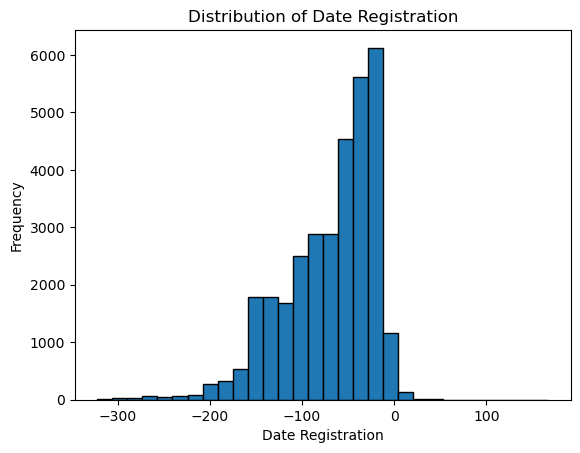

In [242]:
plt.hist(df4['date_registration'], bins=30, edgecolor='black')
plt.title("Distribution of Date Registration")
plt.xlabel("Date Registration")
plt.ylabel("Frequency")
plt.show()

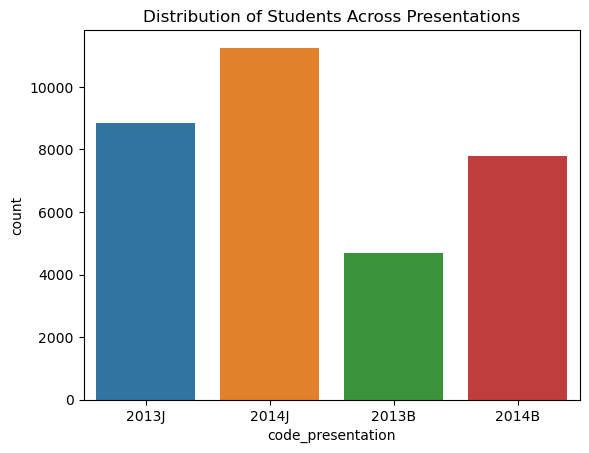

In [246]:
sns.countplot(x='code_presentation', data=df4)
plt.title("Distribution of Students Across Presentations")
plt.show()

## student vle (df5)

In [247]:
df5 = pd.read_csv("studentVle.csv")
df5

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [248]:
df5.nunique()

code_module              7
code_presentation        4
id_student           26074
id_site               6268
date                   295
sum_click              498
dtype: int64

In [249]:
#displaying data type of each value using the 4th row as an example
example_index = 3  

# Get the third example (row) as a Series
example = df5.iloc[example_index]

# Iterate through the columns (features) and print their data types
for feature, data_type in example.items():
    print(f"Feature '{feature}' has data type: {type(data_type).__name__}")

Feature 'code_module' has data type: str
Feature 'code_presentation' has data type: str
Feature 'id_student' has data type: int64
Feature 'id_site' has data type: int64
Feature 'date' has data type: int64
Feature 'sum_click' has data type: int64


In [250]:
#showing descriptive statistics
df5.describe()

,id_student,id_site,date,sum_click
count,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
mean,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00
max,2.698588e+06,1.049562e+06,2.690000e+02,6.977000e+03


In [251]:
#check for missing values
df5.isna().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

In [252]:
#encoding as usual
#one hot encoding the feature code_presentation
df5_tmp=df5.copy()
# we define the encoder
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(df5[['code_presentation']])
# we transform the data
df5_tmp = encoder.transform(df5[['code_presentation']])
df5_tmp = pd.DataFrame(df5_tmp.toarray(), columns=encoder.get_feature_names_out(['code_presentation']))
#dodajemo u df5
df5 = pd.concat([df5, df5_tmp], axis=1)
df5

,code_module,code_presentation,id_student,id_site,date,sum_click,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J
0,AAA,2013J,28400,546652,-10,4,0.0,1.0,0.0,0.0
1,AAA,2013J,28400,546652,-10,1,0.0,1.0,0.0,0.0
2,AAA,2013J,28400,546652,-10,1,0.0,1.0,0.0,0.0
3,AAA,2013J,28400,546614,-10,11,0.0,1.0,0.0,0.0
4,AAA,2013J,28400,546714,-10,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3,0.0,0.0,0.0,1.0
10655276,GGG,2014J,675578,896943,269,1,0.0,0.0,0.0,1.0
10655277,GGG,2014J,654064,896943,269,3,0.0,0.0,0.0,1.0
10655278,GGG,2014J,654064,896939,269,1,0.0,0.0,0.0,1.0


In [253]:
df5['code_module_encoded'] = le.fit_transform(df5['code_module'])
df5

,code_module,code_presentation,id_student,id_site,date,sum_click,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J,code_module_encoded
0,AAA,2013J,28400,546652,-10,4,0.0,1.0,0.0,0.0,0
1,AAA,2013J,28400,546652,-10,1,0.0,1.0,0.0,0.0,0
2,AAA,2013J,28400,546652,-10,1,0.0,1.0,0.0,0.0,0
3,AAA,2013J,28400,546614,-10,11,0.0,1.0,0.0,0.0,0
4,AAA,2013J,28400,546714,-10,1,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3,0.0,0.0,0.0,1.0,6
10655276,GGG,2014J,675578,896943,269,1,0.0,0.0,0.0,1.0,6
10655277,GGG,2014J,654064,896943,269,3,0.0,0.0,0.0,1.0,6
10655278,GGG,2014J,654064,896939,269,1,0.0,0.0,0.0,1.0,6


In [254]:
#dropping unecessary columns
df5 = df5.drop(columns=['id_site','date'])
df5

,code_module,code_presentation,id_student,sum_click,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J,code_module_encoded
0,AAA,2013J,28400,4,0.0,1.0,0.0,0.0,0
1,AAA,2013J,28400,1,0.0,1.0,0.0,0.0,0
2,AAA,2013J,28400,1,0.0,1.0,0.0,0.0,0
3,AAA,2013J,28400,11,0.0,1.0,0.0,0.0,0
4,AAA,2013J,28400,1,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
10655275,GGG,2014J,675811,3,0.0,0.0,0.0,1.0,6
10655276,GGG,2014J,675578,1,0.0,0.0,0.0,1.0,6
10655277,GGG,2014J,654064,3,0.0,0.0,0.0,1.0,6
10655278,GGG,2014J,654064,1,0.0,0.0,0.0,1.0,6


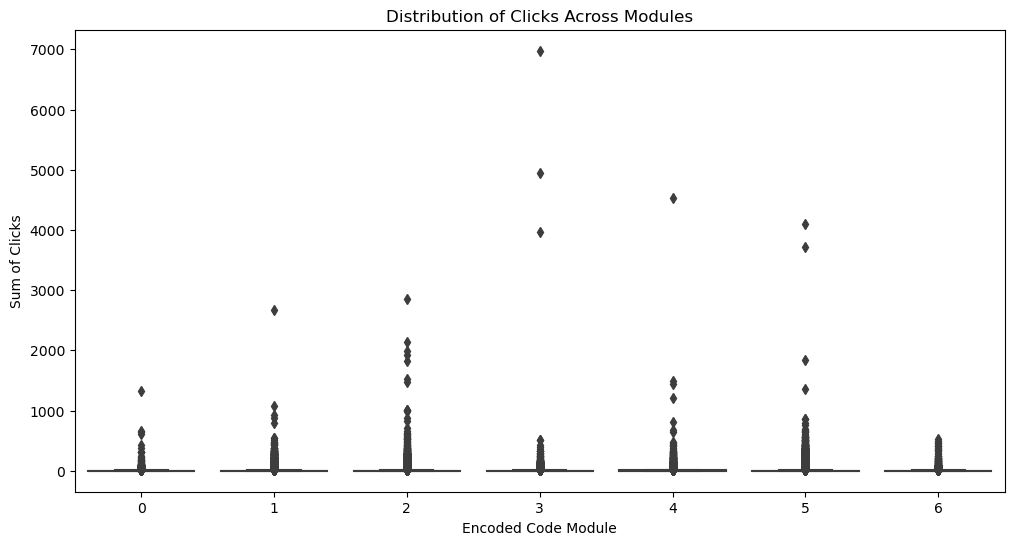

In [256]:
#distribution of clicks across modules and presentationsb
plt.figure(figsize=(12, 6))
sns.boxplot(x='code_module_encoded', y='sum_click', data=df5)
plt.title('Distribution of Clicks Across Modules')
plt.xlabel('Encoded Code Module')
plt.ylabel('Sum of Clicks')
plt.show()

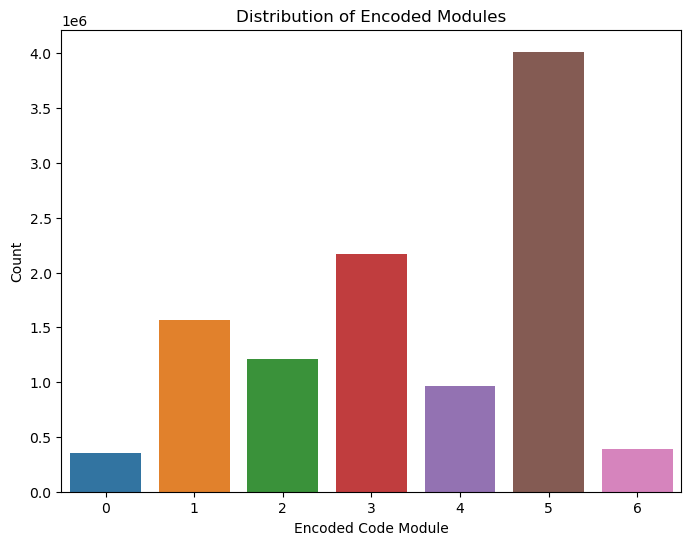

In [260]:
#distribution of encoded modules
plt.figure(figsize=(8, 6))
sns.countplot(x='code_module_encoded', data=df5)
plt.title('Distribution of Encoded Modules')
plt.xlabel('Encoded Code Module')
plt.ylabel('Count')
plt.show()

## VLE (df6)

In [157]:
df6 = pd.read_csv("vle.csv")
df6

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [158]:
#displaying data type of each value using the 4th row as an example
example_index = 3  

# Get the third example (row) as a Series
example = df6.iloc[example_index]

# Iterate through the columns (features) and print their data types
for feature, data_type in example.items():
    print(f"Feature '{feature}' has data type: {type(data_type).__name__}")

Feature 'id_site' has data type: int64
Feature 'code_module' has data type: str
Feature 'code_presentation' has data type: str
Feature 'activity_type' has data type: str
Feature 'week_from' has data type: float64
Feature 'week_to' has data type: float64


In [159]:
#showing descriptive statistics
df6.describe()

,id_site,week_from,week_to
count,6.364000e+03,1121.000000,1121.000000
mean,7.260991e+05,15.204282,15.214987
std,1.283151e+05,8.792865,8.779806
min,5.267210e+05,0.000000,0.000000
25%,6.615928e+05,8.000000,8.000000
50%,7.300965e+05,15.000000,15.000000
75%,8.140162e+05,22.000000,22.000000
max,1.077905e+06,29.000000,29.000000


In [160]:
#check for missing values
df6.isna().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

we can see that most of 'week_from' and 'week_to' values are missing + this information is not cruicial for the analysis nor was it used in the research so we can drop them


In [161]:
df6 = df6.drop(columns=['week_from','week_to'])
df6

,id_site,code_module,code_presentation,activity_type
0,546943,AAA,2013J,resource
1,546712,AAA,2013J,oucontent
2,546998,AAA,2013J,resource
3,546888,AAA,2013J,url
4,547035,AAA,2013J,resource
...,...,...,...,...
6359,897063,GGG,2014J,resource
6360,897109,GGG,2014J,resource
6361,896965,GGG,2014J,oucontent
6362,897060,GGG,2014J,resource


In [162]:
#checking for monotonous values
df6.nunique()


id_site              6364
code_module             7
code_presentation       4
activity_type          20
dtype: int64

In [163]:
#id_site can also be dropped
df6 = df6.drop(columns=['id_site'])
df6

,code_module,code_presentation,activity_type
0,AAA,2013J,resource
1,AAA,2013J,oucontent
2,AAA,2013J,resource
3,AAA,2013J,url
4,AAA,2013J,resource
...,...,...,...
6359,GGG,2014J,resource
6360,GGG,2014J,resource
6361,GGG,2014J,oucontent
6362,GGG,2014J,resource


In [165]:
#encoding as previously
#we could also encode the feature 'activity_type' but since this feature is not used in the analysis we can just leave it

#one hot encoding the feature code_presentation
df6_tmp=df6.copy()
# we define the encoder
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(df6[['code_presentation']])
# we transform the data
df6_tmp = encoder.transform(df6[['code_presentation']])
df6_tmp = pd.DataFrame(df6_tmp.toarray(), columns=encoder.get_feature_names_out(['code_presentation']))
#dodajemo u df6
df6 = pd.concat([df6, df6_tmp], axis=1)
df6

,code_module,code_presentation,activity_type,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J
0,AAA,2013J,resource,0.0,1.0,0.0,0.0
1,AAA,2013J,oucontent,0.0,1.0,0.0,0.0
2,AAA,2013J,resource,0.0,1.0,0.0,0.0
3,AAA,2013J,url,0.0,1.0,0.0,0.0
4,AAA,2013J,resource,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
6359,GGG,2014J,resource,0.0,0.0,0.0,1.0
6360,GGG,2014J,resource,0.0,0.0,0.0,1.0
6361,GGG,2014J,oucontent,0.0,0.0,0.0,1.0
6362,GGG,2014J,resource,0.0,0.0,0.0,1.0


In [166]:
df6['code_module_encoded'] = le.fit_transform(df6['code_module'])
df6

,code_module,code_presentation,activity_type,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J,code_module_encoded
0,AAA,2013J,resource,0.0,1.0,0.0,0.0,0
1,AAA,2013J,oucontent,0.0,1.0,0.0,0.0,0
2,AAA,2013J,resource,0.0,1.0,0.0,0.0,0
3,AAA,2013J,url,0.0,1.0,0.0,0.0,0
4,AAA,2013J,resource,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
6359,GGG,2014J,resource,0.0,0.0,0.0,1.0,6
6360,GGG,2014J,resource,0.0,0.0,0.0,1.0,6
6361,GGG,2014J,oucontent,0.0,0.0,0.0,1.0,6
6362,GGG,2014J,resource,0.0,0.0,0.0,1.0,6


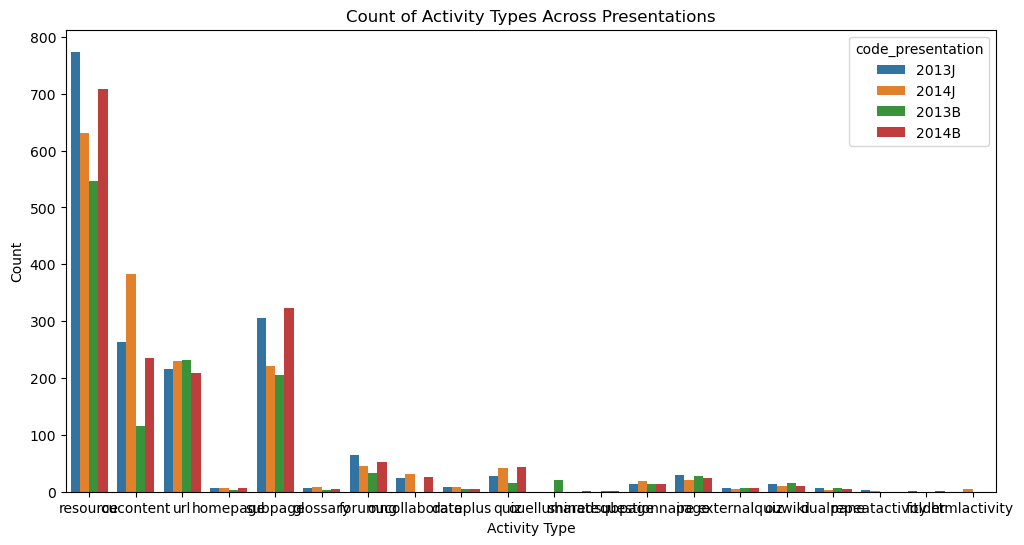

In [262]:
#activity types across presentations
plt.figure(figsize=(12, 6))
sns.countplot(x='activity_type', hue='code_presentation', data=df6)
plt.title('Count of Activity Types Across Presentations')
plt.xlabel('Activity Type')
plt.ylabel('Count')
plt.show()

## studentAssessment (df7)

In [167]:
df7 = pd.read_csv("studentAssessment.csv")
df7

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [168]:
#displaying data type of each value using the 4th row as an example
example_index = 3  

# Get the third example (row) as a Series
example = df7.iloc[example_index]

# Iterate through the columns (features) and print their data types
for feature, data_type in example.items():
    print(f"Feature '{feature}' has data type: {type(data_type).__name__}")

Feature 'id_assessment' has data type: float
Feature 'id_student' has data type: float
Feature 'date_submitted' has data type: float
Feature 'is_banked' has data type: float
Feature 'score' has data type: float


In [169]:
#showing descriptive statistics
df7.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


In [170]:
df7.nunique()

id_assessment       188
id_student        23369
date_submitted      312
is_banked             2
score               101
dtype: int64

score is the only feature from this dataset that is important for the analysis. However, since the score is in range from 0-100 (rather than expected 100), let's look at whether there are missing values in this column

In [183]:
df7.isna().sum()


id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

there are 173 missing values in the 'score' column. According to the official data descriptor of the dataset: 'If the student does not submit the assessment, no result is recorded.' We need to decide whether the information about a student is valuable for the analysis. Since the researchers used the 'Pass', 'Fail', 'Distinction', 'Withdrawn' values in their analysis, let's see if the number of students not submitting corresponds to the all together score of 'Withdrawn' or 'Fail' values

In [189]:
count_withdrawn = df3['final_result'].value_counts()['Withdrawn']
print(count_withdrawn)

10156


In [190]:
count_fail = df3['final_result'].value_counts()['Fail']
print(count_fail)

7052


In [195]:
print((df7['score'] <= 40).sum()) #according to the descriptor 'The score lower than 40 is interpreted as Fail'

9544


The missing score values are significantly lower than the number of failing or withdrawn students, which means that the students not submitting their assessments were not used in the analysis. This means we can drop those rows from the dataset.

In [201]:
df7_cleaned = df7.copy()
df7_cleaned=df7.loc[df7.score.notnull(), :].reset_index(drop = True)

df7_cleaned.isna().sum()


id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

In [203]:
#since 'score' is the only valuable column in this dataset, we can drop 'date_submitted' and 'is_banked'
df7_cleaned = df7_cleaned.drop(columns=['date_submitted','is_banked'])
df7_cleaned

,id_assessment,id_student,score
0,1752,11391,78.0
1,1752,28400,70.0
2,1752,31604,72.0
3,1752,32885,69.0
4,1752,38053,79.0
...,...,...,...
173734,37443,527538,60.0
173735,37443,534672,100.0
173736,37443,546286,80.0
173737,37443,546724,100.0


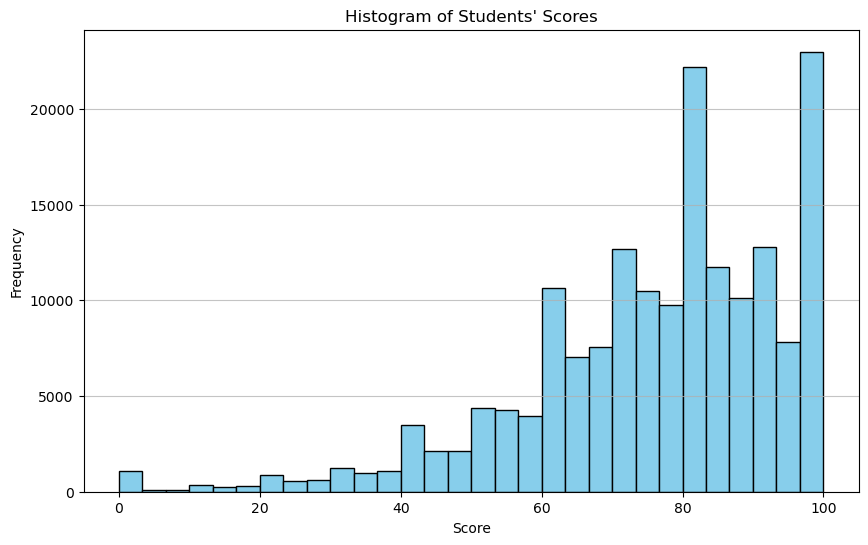

In [233]:
#a histogram visualizing students' scores
plt.figure(figsize=(10, 6))
plt.hist(df7['score'], bins=30, color='skyblue', edgecolor='black') 
plt.title("Histogram of Students' Scores")
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

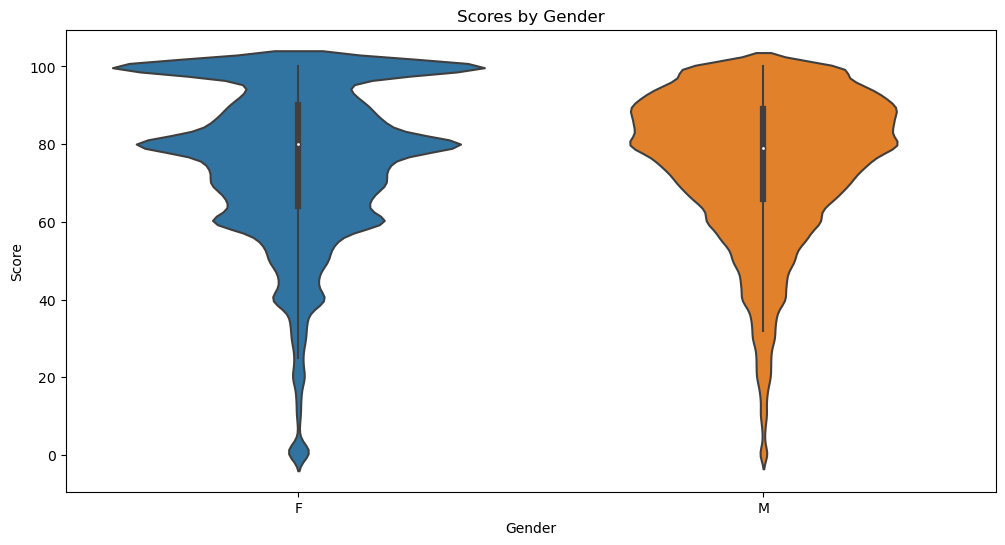

In [265]:
#scores across genderb
merged_df = pd.merge(df7[['id_student', 'score']], df3[['id_student', 'gender']], on='id_student', how='inner')

plt.figure(figsize=(12, 6))
sns.violinplot(x='gender', y='score', data=merged_df)
plt.title('Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Score')
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


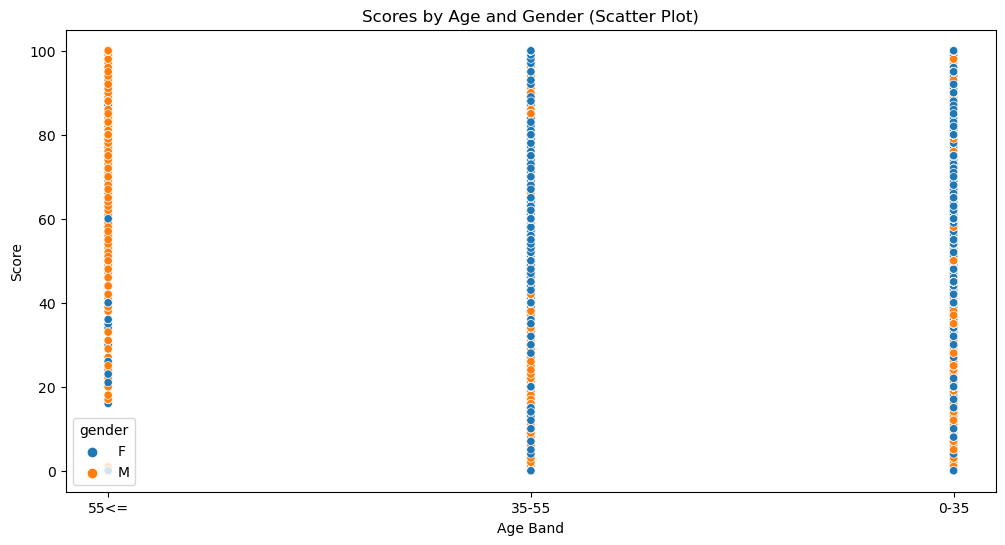

In [269]:

merged_df = pd.merge(df3, df7, on='id_student', how='inner')

plt.figure(figsize=(12, 6))
sns.scatterplot(x='age_band', y='score', data=merged_df, hue='gender')
plt.title('Scores by Age and Gender (Scatter Plot)')
plt.xlabel('Age Band')
plt.ylabel('Score')
plt.show()

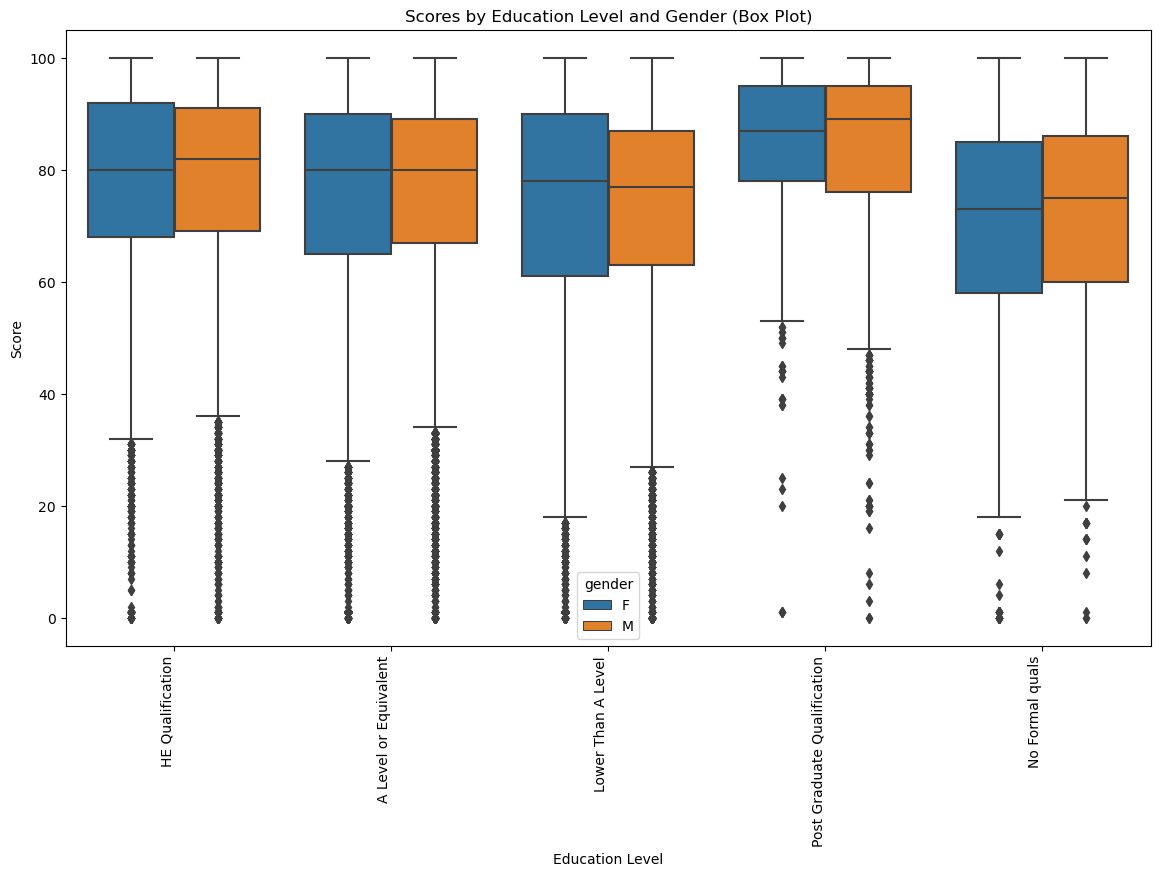

In [273]:
merged_df = pd.merge(df7, df3, on='id_student', how='inner')

plt.figure(figsize=(14, 8))
sns.boxplot(x='highest_education', y='score', data=merged_df, hue='gender')
plt.title('Scores by Education Level and Gender (Box Plot)')
plt.xlabel('Education Level')
plt.ylabel('Score')
plt.xticks(rotation=90, ha='right') 
plt.show()

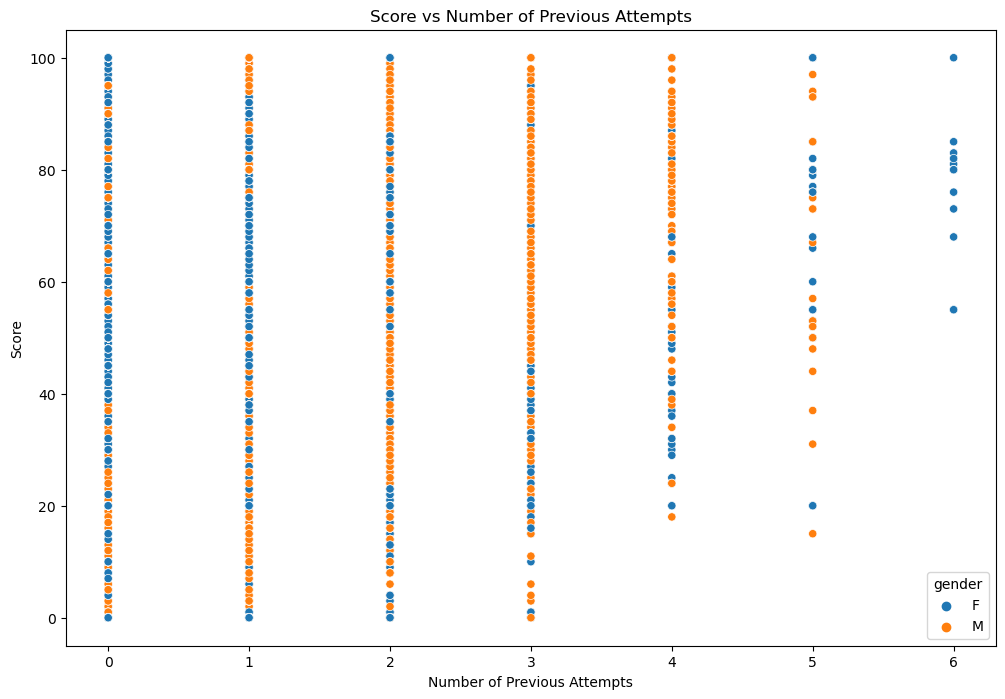

In [275]:
merged_df = pd.merge(df7, df3, on='id_student', how='inner')

plt.figure(figsize=(12, 8))
sns.scatterplot(x='num_of_prev_attempts', y='score', data=merged_df, hue='gender')
plt.title('Score vs Number of Previous Attempts')
plt.xlabel('Number of Previous Attempts')
plt.ylabel('Score')
plt.show()

In [276]:
#saving files
filename = "df1_cleaned.csv"
df1.to_csv(filename, index = False)
filename = "df2_cleaned.csv"
df2.to_csv(filename, index = False)
filename = "df3_cleaned.csv"
df3.to_csv(filename, index = False)
filename = "df4_cleaned.csv"
df4.to_csv(filename, index = False)
filename = "df5_cleaned.csv"
df5.to_csv(filename, index = False)
filename = "df6_cleaned.csv"
df6.to_csv(filename, index = False)
filename = "df7_cleaned.csv"
df7_cleaned.to_csv(filename, index = False)